# Project 2: Investigate TMDB Dataset

## Jordan Mazza

For this project, I chose to analyse the TMDb Dataset.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv('/Users/jordanmazza/Desktop/Udacity Files/Project 2/movies.csv')

## Introduction
This dataset is provided by the TMDb. There are 10866 rows, corresponding to unique movies, and 21 columns with variables about the movies such as genre, runtime, title, and revenue. This dataset has gathered data about movies from the 1960's to 2015. After scrolling through the dataset for a few minutes a few prominent questions came to mind:

    1. Does a movie's budget effect its success?
       This question is useful to know because it will give production companies a good idea on their investment return when funding movie projects.
       
    2.Does the season in which a movie was released effect a movie's success?
       This is a useful relationship to be aware of when planning when to release a movie.

    3. Have movie lengths decreased over time?
       I hypothesize that over time, movies have gotten much longer in length. Many movies I have seen from the mid 1900's were less than 90 minutes, while nowadays, it is not uncommon for movies last over 2 hours. I wanted to analyze this to see what the relationship between time and runtime was.
       
    4. Which directors make the highest grossing films?
      This is also valuable for production companies to know when hiring directors.
 
 The variables used in this analysis are listed below:
    - budget
    - revenue
    - release_date
    - runtime
    - release_year
    - voter_average
    - vote_count

For this analysis a movie's success is going to be defined in two different ways, the first is by the movie's revenue and the second, the movie's vote average or rating. I want to analyze both these variables because I'm curious if there will be consistency between them. For example, if a movie's budget effects a movie's revenue, does the budget effect a movie's rating in the same way?

## Initial Cleaning
After importing this dataset, I printed the head of the dataframe and decided to remove the columns I wouldn't need.

In [7]:
df.drop(columns=['id', 'popularity', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'budget_adj', 'revenue_adj'], inplace=True)
print(df.head())

     imdb_id     budget     revenue                original_title  \
0  tt0369610  150000000  1513528810                Jurassic World   
1  tt1392190  150000000   378436354            Mad Max: Fury Road   
2  tt2908446  110000000   295238201                     Insurgent   
3  tt2488496  200000000  2068178225  Star Wars: The Force Awakens   
4  tt2820852  190000000  1506249360                     Furious 7   

           director  runtime release_date  vote_count  vote_average  \
0   Colin Trevorrow      124       6/9/15        5562           6.5   
1     George Miller      120      5/13/15        6185           7.1   
2  Robert Schwentke      119      3/18/15        2480           6.3   
3       J.J. Abrams      136     12/15/15        5292           7.5   
4         James Wan      137       4/1/15        2947           7.3   

   release_year  
0          2015  
1          2015  
2          2015  
3          2015  
4          2015  


I then checked for any null values. Only 10 null values popped up originally, so I dropped those rows. To double check, I used .describe() to analyze the dataset. I noticed the budget, revenue, and runtime columns all had minimums of zero, meaning missing values. I used the .shape function to see how many rows had zero values for each column.

In [8]:
# Checking for any missing or irregular data
# print(df.isna().any())
print(df.describe())
print(df[df['revenue'] == 0].shape)
print(df[df['budget'] == 0].shape)
print(df[df['runtime'] == 0].shape)

             budget       revenue       runtime    vote_count  vote_average  \
count  1.086600e+04  1.086600e+04  10866.000000  10866.000000  10866.000000   
mean   1.462570e+07  3.982332e+07    102.070863    217.389748      5.974922   
std    3.091321e+07  1.170035e+08     31.381405    575.619058      0.935142   
min    0.000000e+00  0.000000e+00      0.000000     10.000000      1.500000   
25%    0.000000e+00  0.000000e+00     90.000000     17.000000      5.400000   
50%    0.000000e+00  0.000000e+00     99.000000     38.000000      6.000000   
75%    1.500000e+07  2.400000e+07    111.000000    145.750000      6.600000   
max    4.250000e+08  2.781506e+09    900.000000   9767.000000      9.200000   

       release_year  
count  10866.000000  
mean    2001.322658  
std       12.812941  
min     1960.000000  
25%     1995.000000  
50%     2006.000000  
75%     2011.000000  
max     2015.000000  
(6016, 10)
(5696, 10)
(31, 10)


While the runtime column only has 31 missing values, both the budget and revenue column had a significant amount of missing data. Since over half the rows in these columns had missing data, filling these with the mean could drastically skew the data. Because of this, I removed all rows with missing data. Even though this cut my dataset by over half, I decided having a smaller, more accurate dataset would be better than a heavily skewed one.

To do this, I replaced all 0 values with null values so I could drop them using .dropna(). I got this solution from a Stack Overflow thread. I then I checked for and dropped any duplicates.

In [9]:
df.replace(0, np.nan, inplace=True)
df.dropna(axis=0, how='any', inplace=True)
print(df[df.duplicated()])
df.drop_duplicates(keep='first', inplace=True)

        imdb_id      budget   revenue original_title          director  \
2090  tt0411951  30000000.0  967000.0         TEKKEN  Dwight H. Little   

      runtime release_date  vote_count  vote_average  release_year  
2090     92.0      3/20/10         110           5.0          2010  


## Creating a Column for Season
The first step that needed to be done to answer my second research regarding the relationship between a movie's release season and its success was making the release date column into a datetime dtype.

In [10]:
df['release_date'] =  pd.to_datetime(df['release_date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   imdb_id         3853 non-null   object        
 1   budget          3853 non-null   float64       
 2   revenue         3853 non-null   float64       
 3   original_title  3853 non-null   object        
 4   director        3853 non-null   object        
 5   runtime         3853 non-null   float64       
 6   release_date    3853 non-null   datetime64[ns]
 7   vote_count      3853 non-null   int64         
 8   vote_average    3853 non-null   float64       
 9   release_year    3853 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 331.1+ KB
None


After doing a lot of research and reading many stackoverflow threads, I was able to create an 'if statement' that extracted the season from the release date column. First, I transformed the month and day into strings so I could append them to one another. I had to add a floating zero to the day variable so dates like July 7th would read 707 rather than 77. Then, I created a variable that consisted of the appended month and day and transformed it back into an integer to perform Boolean functions. From there I created an 'if statement' and filtered each date into its respective season. I then assigned this function to a new column called 'release_season'.

In [11]:
def season_release(date):
    month = str(date.month)
    day = str(date.day).zfill(2)
    month_day = int(month + day)
    if (month_day >= 321 and month_day <=620):
         return 'Spring'
    elif (month_day >= 621 and month_day <= 922):
        return 'Summer'
    elif (month_day >= 923 and month_day < 1220):
        return 'Fall'
    else:
        return 'Winter'
df['release_season'] = df['release_date'].map(season_release)
print(df.head())

     imdb_id       budget       revenue                original_title  \
0  tt0369610  150000000.0  1.513529e+09                Jurassic World   
1  tt1392190  150000000.0  3.784364e+08            Mad Max: Fury Road   
2  tt2908446  110000000.0  2.952382e+08                     Insurgent   
3  tt2488496  200000000.0  2.068178e+09  Star Wars: The Force Awakens   
4  tt2820852  190000000.0  1.506249e+09                     Furious 7   

           director  runtime release_date  vote_count  vote_average  \
0   Colin Trevorrow    124.0   2015-06-09        5562           6.5   
1     George Miller    120.0   2015-05-13        6185           7.1   
2  Robert Schwentke    119.0   2015-03-18        2480           6.3   
3       J.J. Abrams    136.0   2015-12-15        5292           7.5   
4         James Wan    137.0   2015-04-01        2947           7.3   

   release_year release_season  
0          2015         Spring  
1          2015         Spring  
2          2015         Winter  
3 

## Plotting and Analyzing the Data

For my first analysis, I made two scatterplots to see if there was a relation between a movie's budget and its success. The first scatterplot defined success as the movie’s rating while the second scatterplot defined success as the movie’s revenue.

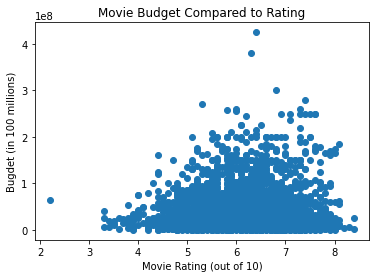

In [12]:
plt.scatter(y=df['budget'], x=df['vote_average'])
plt.ylabel('Bugdet (in 100 millions)')
plt.xlabel('Movie Rating (out of 10)')
plt.title('Movie Budget Compared to Rating')
plt.show()

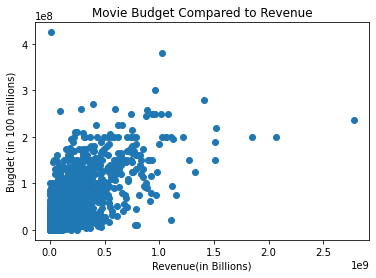

In [13]:
plt.scatter(y=df['budget'], x=df['revenue'])
plt.ylabel('Bugdet (in 100 millions)')
plt.xlabel('Revenue(in Billions)')
plt.title('Movie Budget Compared to Revenue')
plt.show()

For my second analysis, I used a bar graph to see if there was any relationship between a movie's release season and its success. Again, I created two bar graphs, one defining success as the movie’s rating and the other as the movie’s revenue. Since seasons are a categorical variable, a bar chart better suits this analysis in comparison to a line plot or scatter plot.

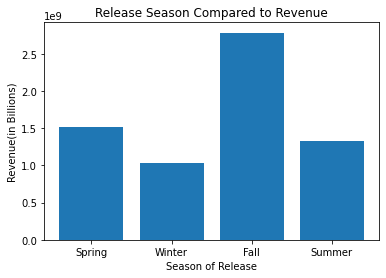

In [16]:
plt.bar(x=df['release_season'], height=df['revenue'])
plt.xlabel('Season of Release')
plt.ylabel('Revenue(in Billions)')
plt.title('Release Season Compared to Revenue')
plt.show()

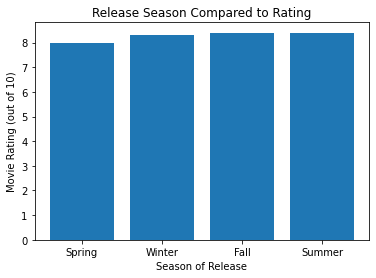

In [17]:
plt.bar(x=df['release_season'], height=df['vote_average'])
plt.xlabel('Season of Release')
plt.ylabel('Movie Rating (out of 10)')
plt.title('Release Season Compared to Rating')
plt.show()

In my third analysis I used a line plot to visualize how movie runtimes have changed over time. I used a line plot because this plot type is best suited for showing changes over time. Since each year in the dataframe has multiple runtime entries, the first time I tried to plot this, it was unreadable. So, I created a variable that grouped the runtimes by year and then took the mean to create a more coherent visualization.

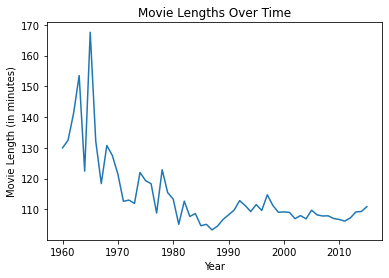

In [18]:
runtime_mean = df.groupby('release_year')['runtime'].mean()
plt.plot(runtime_mean)
plt.xlabel('Year')
plt.ylabel('Movie Length (in minutes)')
plt.title('Movie Lengths Over Time')
plt.show()

Finally, for my last analysis, I performed a similar grouping method. From this method, I was able to group each director and find the average movie revenue for the movies they directed. Since there were thousands of directors, I also sorted by the revenue column in descending order and used only the first 10 inputs. This gave me the top ten directors/director teams with the highest grossing films. I used a bar chart for this visualization because the director column is categorical.

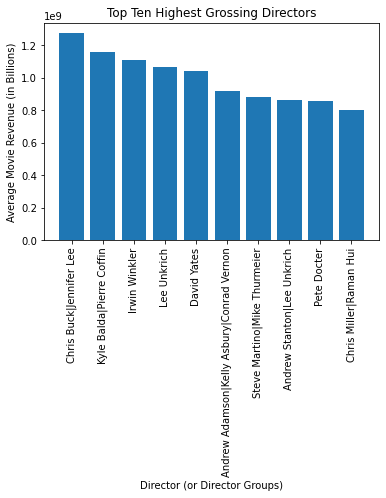

In [19]:
director_rev = df.groupby('director', as_index=False)['revenue'].mean().sort_values('revenue', ascending=False)
director_rev = director_rev.head(10)

plt.bar(x=director_rev['director'], height=director_rev['revenue'])
plt.xticks(rotation='vertical')
plt.xlabel('Director (or Director Groups)')
plt.ylabel('Average Movie Revenue (in Billions)')
plt.title('Top Ten Highest Grossing Directors')
plt.show()

## Conclusions

In my first plot, it doesn’t seem like there is any correlation between movie budget and success as even high budget movies were rated similarly to low budget movies. Looking at the second scatterplot, however, there does seem to be a loose correlation between movie budget and revenue, where the higher the budget, the higher the revenue. Neither of these scatter plots show a significant correlation between the variables, so more analysis would be required before coming to any conclusions.

In regard to my second question using the release season and movie success variable, I got surprising results. I went into this analysis expecting summer releases to be the most successful category; however, as seen below, this is not the case. When using revenue as the success variable, it is clear that movies released in the Fall seem to be much more successful than any other season. Again, when you compare these results to the bar chart where success is defined as movie ratings, the release season seems to have no effect.

My hypothesis about movie runtimes increasing overtime was proven wrong. It seems movie times have actually significantly decreased from the 1960's onward. This shows the importance of research and visualization. If I had not performed this analysis, I would have made a blatantly incorrect assumption about runtime trends over time.

My final plot shows the visualization for my fourth question – a chart of directors with - on average - the highest grossing movies. Interestingly enough, many of the directors in this top ten list directed animated movies like Pixar and DreamWorks movies. This could be valuable for production companies to know because it shows there is a lot of money and return on investment in animated movies.

## Limitations
For the first two analyses, we must be careful when coming to conclusions because it seems to greatly depend on how a movie’s success is defined. Movie ratings are not affected by the budget or release season of the movie. If I were to just use this variable to measure success, I would see there was absolutely no relationship. However, it is clear – particularly when looking at release season – that a movie’s success could be influenced by these two variables. Ideally more analyses and testing should be done before anything is concluded about a movie's budget and release season influencing a movie's success.

For this project, I used the budget and revenue columns rather than the adjusted budget and revenue columns, which adjusts for inflation. This is also important to keep in mind because inflation could potentially have an effect on these variables and provide different results.

For the third question in my project, I grouped the movie runtime’s by year and then took the average for each year. I also performed a similar function for my final question. It’s important to note anytime you use an average, to be wary of the results because there could be outliers affecting the mean that could skew the final results.

For my final analysis, I debated separating out the directors for each value that had multiple directors in the column; however, I decided to keep the column as is. From the viewpoint of a production company, it would be helpful to know what conditions a director is most successful under. Perhaps there is a director who doesn’t make high grossing movies alone, but when paired with someone else is very successful. This information could be valuable, and for that reason, I left the director teams in my analysis. While I chose to leave this in for this project, it could also influence the result of the analysis, so it's important to note that more analyses should be run on these directors to ensure this data is accurate.

### Sources
Creating Season Column: https://stackoverflow.com/questions/16139306/determine-season-given-timestamp-in-python-using-datetime/53694615

Adding Floating Zero for Season Function: https://stackoverflow.com/questions/733454/best-way-to-format-integer-as-string-with-leading-zeros

Dropping Rows with Zeros: https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame